<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: BASEBALL CASE STUDY</span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">SHAPE OF DATASET</span>

In [3]:
df.shape

(30, 17)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">TOP 5 ROWS OF DATASET</span>

In [4]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">BOTTOM 5 ROWS OF DATASET</span>

In [5]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING NULL VALUES IN DATASET</span>

In [6]:
df.isnull()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VALUE COUNTS OF NULL VALUES IN DATASET</span>

In [7]:
df.isnull().value_counts()

W      R      AB     H      2B     3B     HR     BB     SO     SB     RA     ER     ERA    CG     SHO    SV     E    
False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False  False    30
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:CORRELATION BETWEEN VARIABLES OF DATASET</span>

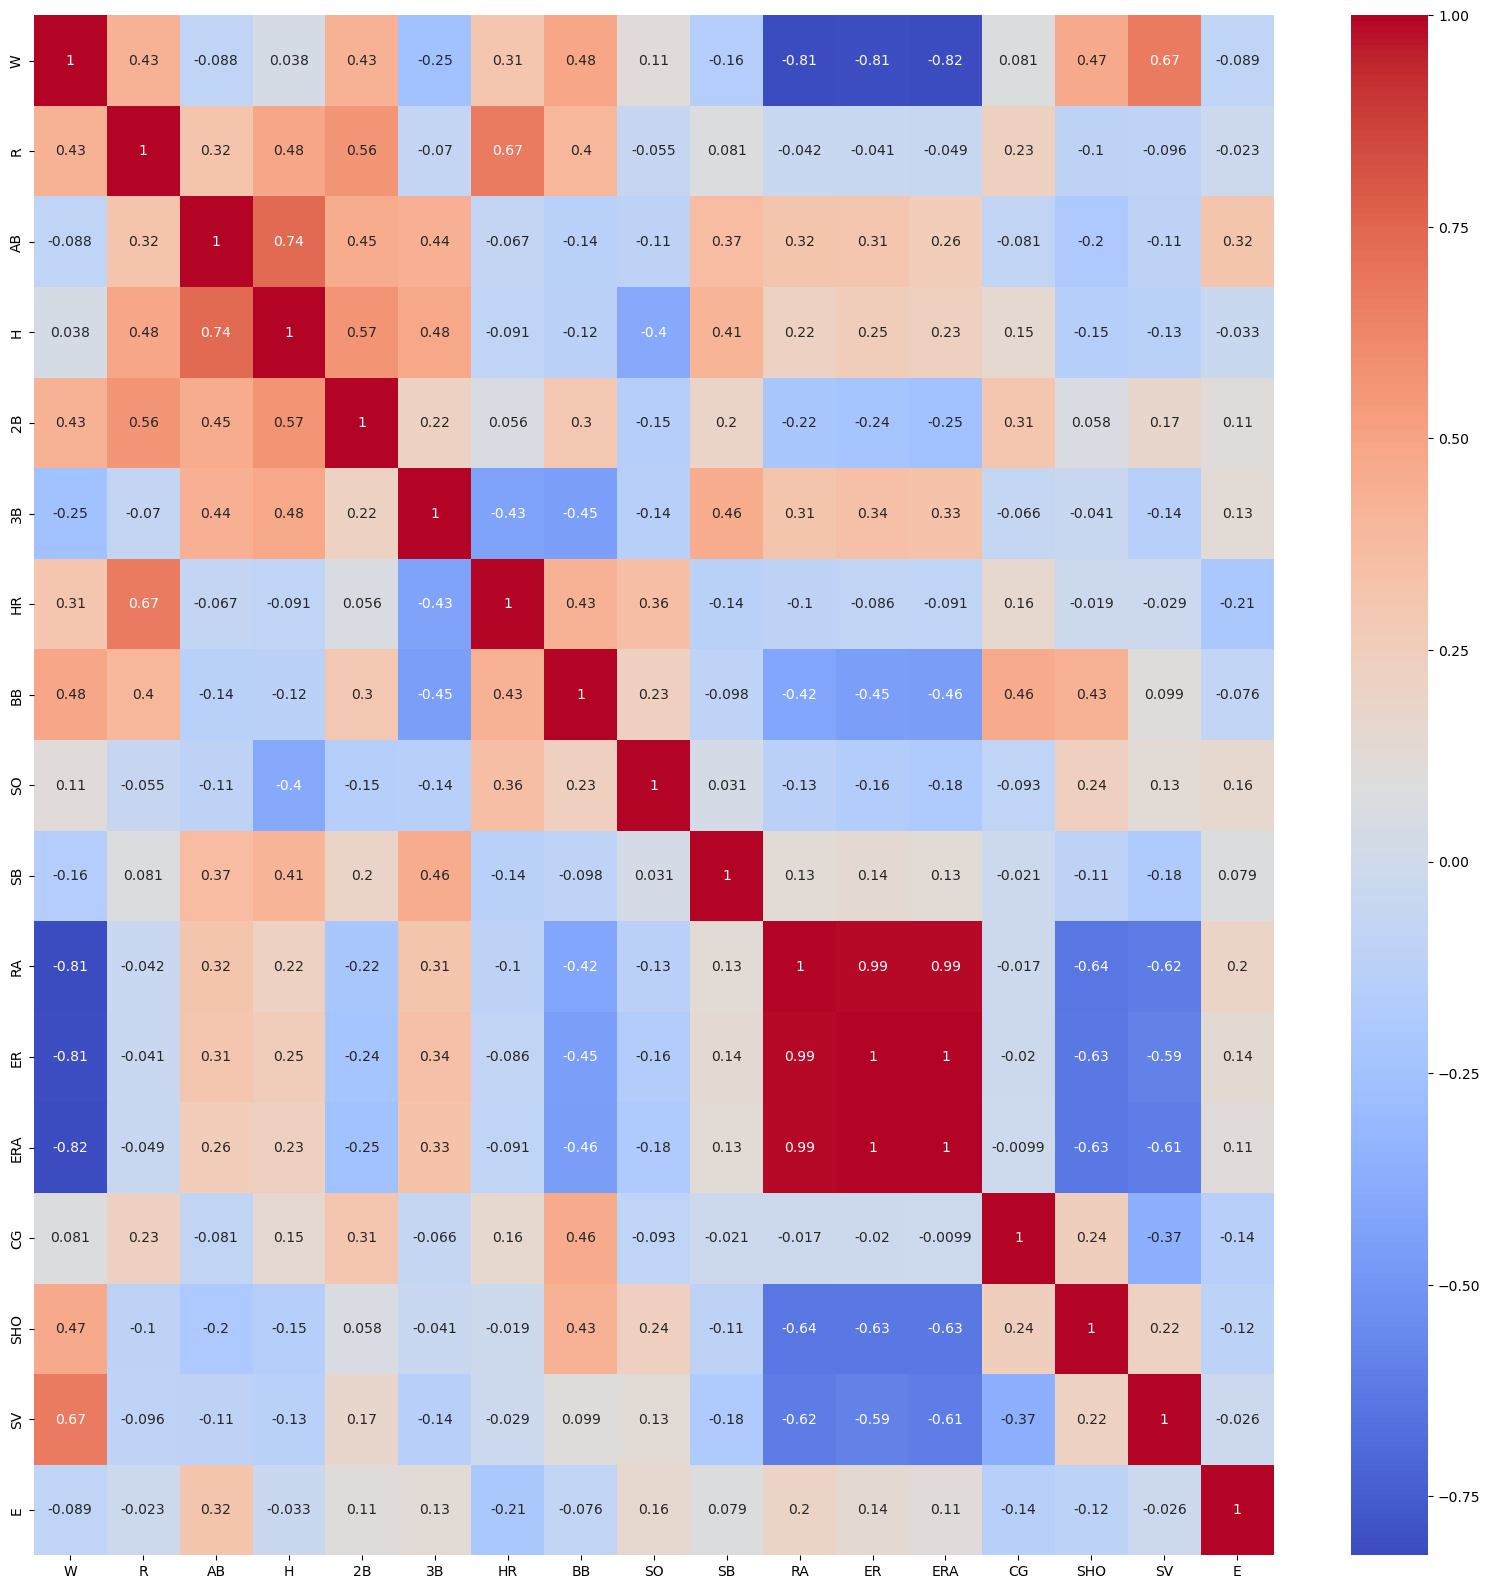

In [8]:
plt.figure(figsize=(20,20), facecolor='white')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">STATS OF DATASET</span>

In [9]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING SKEWNESS IN DATASET</span>

In [10]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [11]:
df.skew().abs()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B     0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO     0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CORRECTION OF SKEWNESS</span>

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">DISTRIBUTION PLOTS:AFTER CORRECTION OF SKEWNESS</span>

In [12]:
import numpy as np
from scipy.stats import boxcox
import pandas as pd


# Correct skewness using Box-Cox transformation
skewed_columns_mask = np.array(df.skew().abs() > 0.5)
skewed_columns = df.columns[skewed_columns_mask]

# Calculate the constant using a dictionary comprehension
constants = {col: abs(df[col].min()) + 1 for col in skewed_columns}

# Apply Box-Cox transformation with the correct constant for each column
for col in skewed_columns:
    constant = constants[col]
    df[col] = df[col].apply(lambda x: x + constant if x <= 0 else x)
    transformed_col, _ = boxcox(df[col])
    df[col] = transformed_col

# Display the DataFrame after correcting skewness
print("\nDataFrame after correcting skewness:")
print(df)
print("\nSkewness of each column after transformation:")
print(df.skew())



DataFrame after correcting skewness:
      W         R    AB         H   2B  3B        HR   BB    SO   SB   RA  \
0    95  0.512248  5575  0.103289  300  42  5.221557  383   973  104  641   
1    83  0.512247  5467  0.103289  277  44  5.350790  439  1264   70  700   
2    81  0.512247  5439  0.103289  303  29  5.237540  533  1157   86  640   
3    76  0.512247  5533  0.103289  260  27  5.197157  404  1231   68  701   
4    74  0.512247  5605  0.103289  289  49  5.314269  455  1259   83  803   
5    93  0.512248  5509  0.103289  308  17  5.797907  570  1151   88  670   
6    87  0.512248  5567  0.103289  272  19  5.695991  554  1227   63  698   
7    81  0.512248  5485  0.103289  246  20  5.722324  418  1331   44  693   
8    80  0.512247  5485  0.103289  278  32  5.427266  436  1310   87  642   
9    78  0.512248  5640  0.103289  294  33  5.386184  478  1148   71  753   
10   88  0.512248  5511  0.103289  279  32  5.460413  503  1233  101  733   
11   86  0.512248  5459  0.103289  278

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Guidelines for skewness interpretation </span>



<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">Ideal skewness Value is between -0.5 and 0.5: for symmetric Data.</span>


<span style="color:Blue;font-size: 15px;font-family: verdana;font-weight: bold ">If the skewness is between -1 and -0.5 (left-skewed) or between 0.5 and 1 (right-skewed), the distribution is moderately skewed.</span>


<span style="color:Blue;font-size: 15px;font-family: verdana;font-weight: bold ">If the skewness is less than -1 (strongly left-skewed) or greater than 1 (strongly right-skewed), the distribution is highly skewed.</span>

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Skewness Interpretation</span>

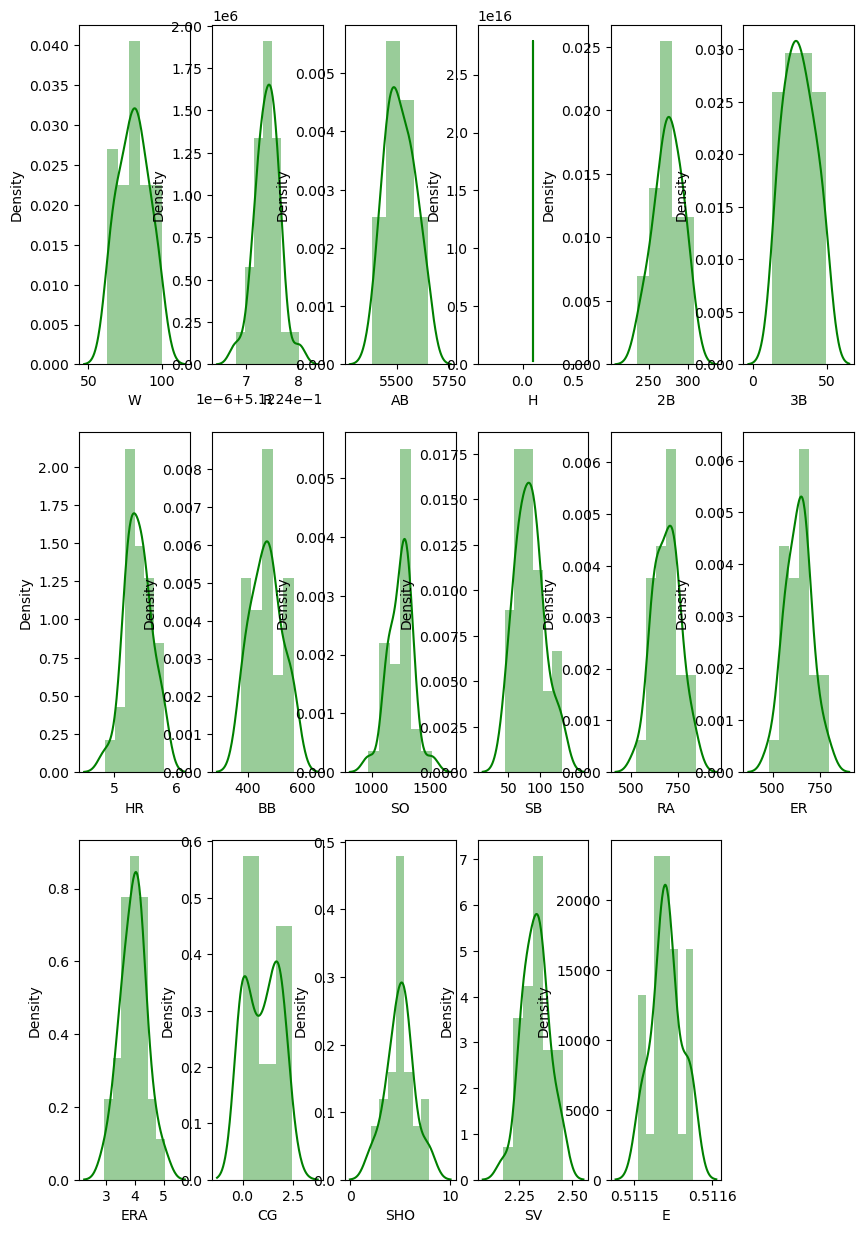

In [13]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.distplot(df[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Outiers Interpretation</span>

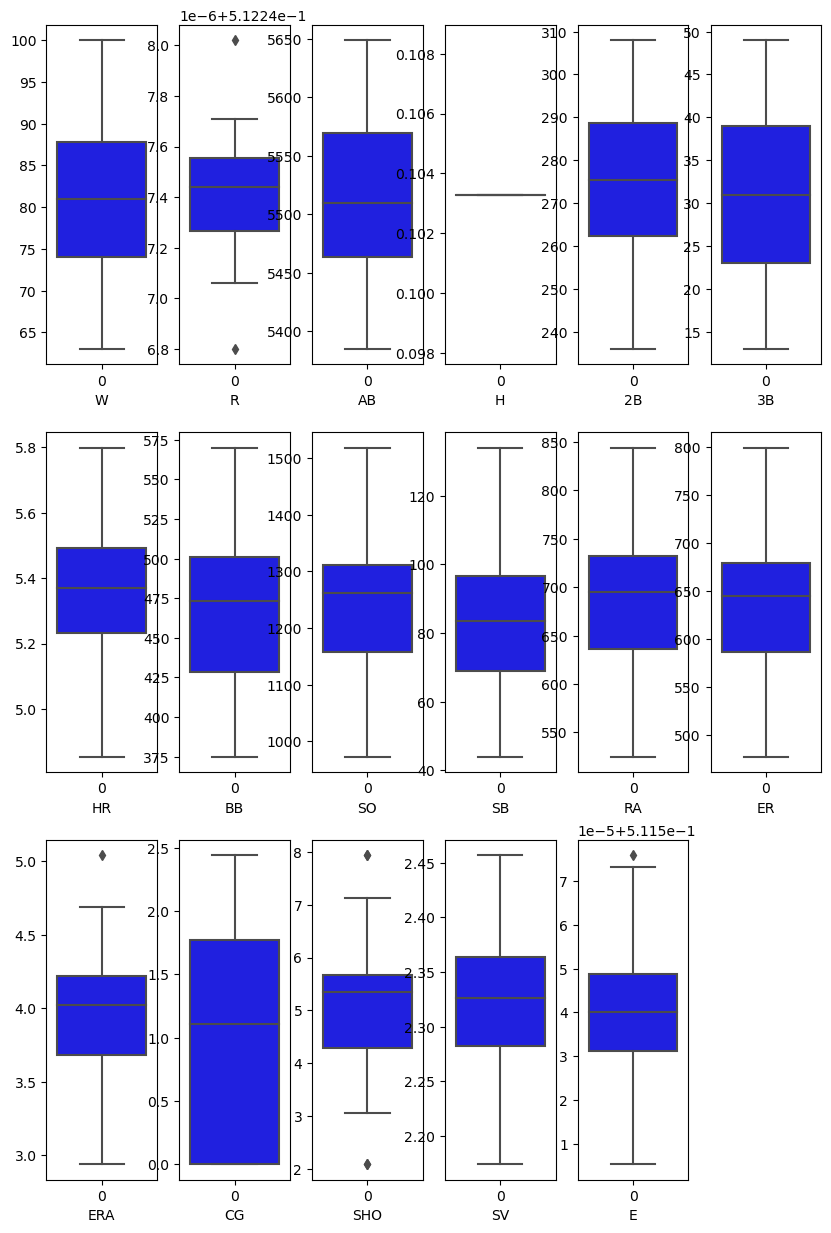

In [14]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: Relationship between Predictors(Inputs) and Targets</span>

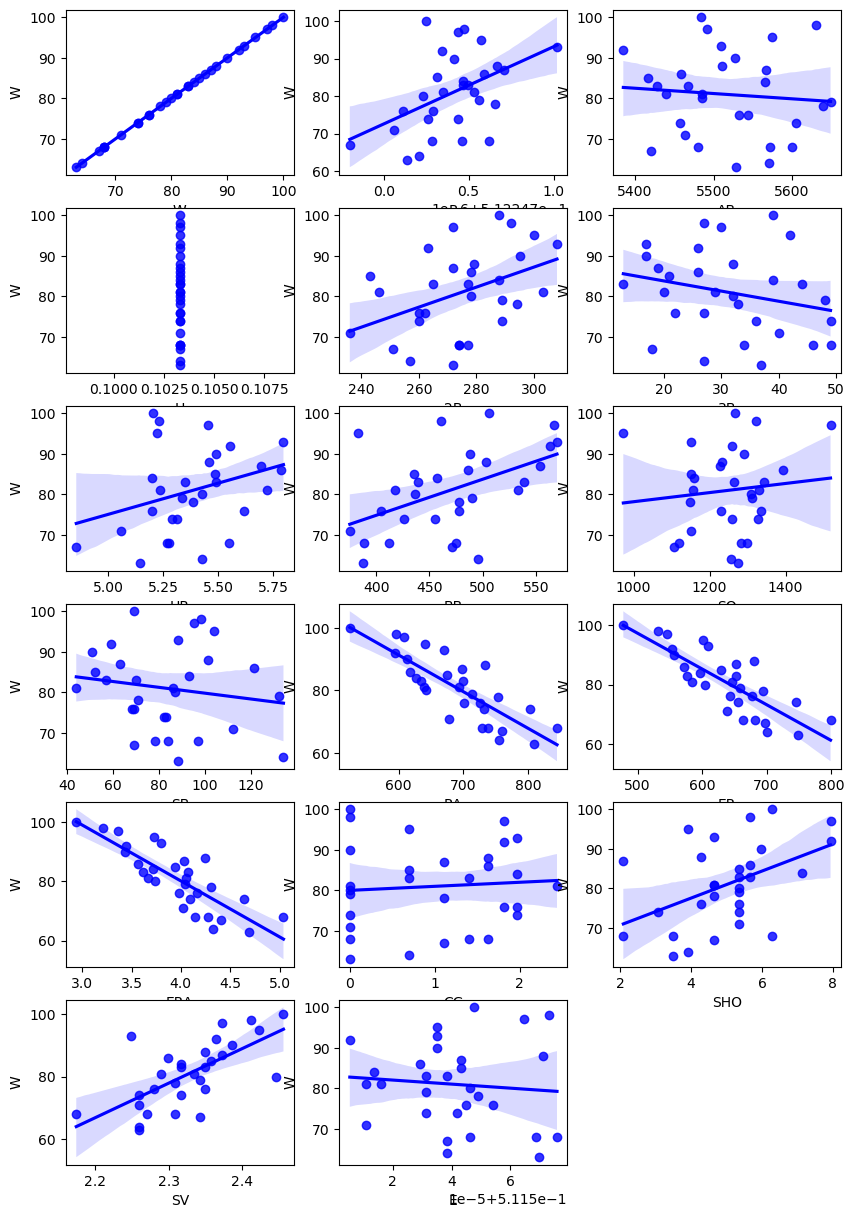

In [15]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df.columns:
    if pltnum<18:
        plt.subplot(6,3, pltnum)
        sns.regplot(x=i, y='W', data=df, color='b')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: HISTPLOT-REGRESSION PLOT-BOXPLOTS</span>

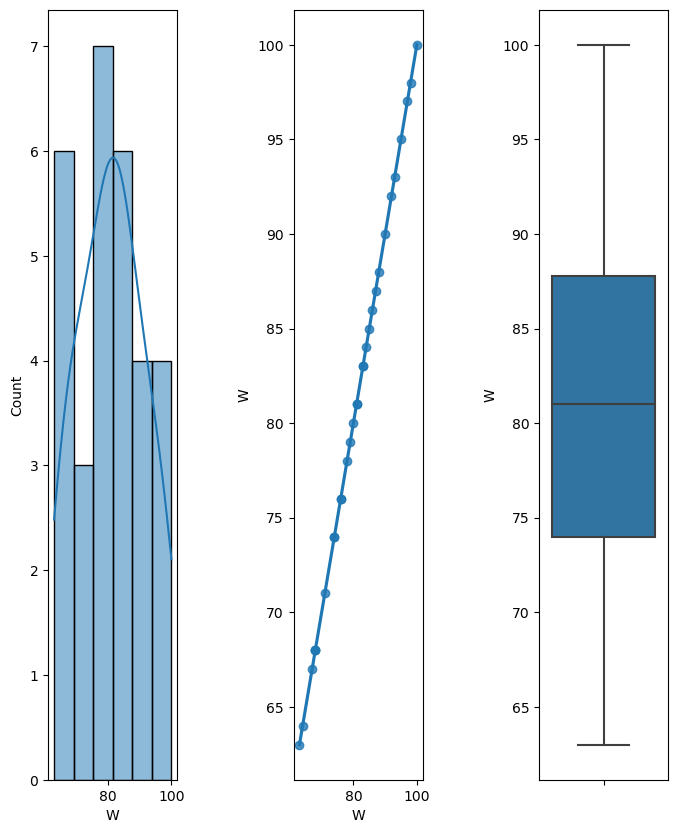

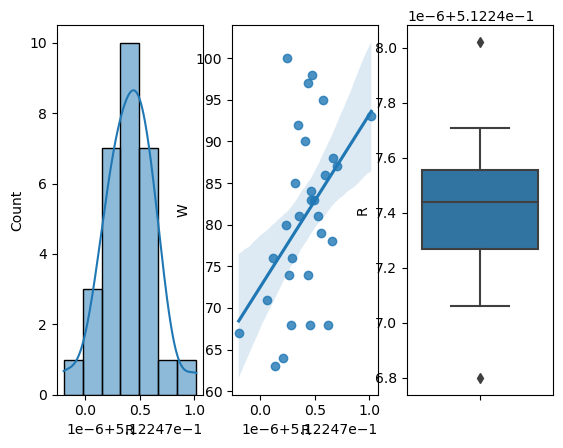

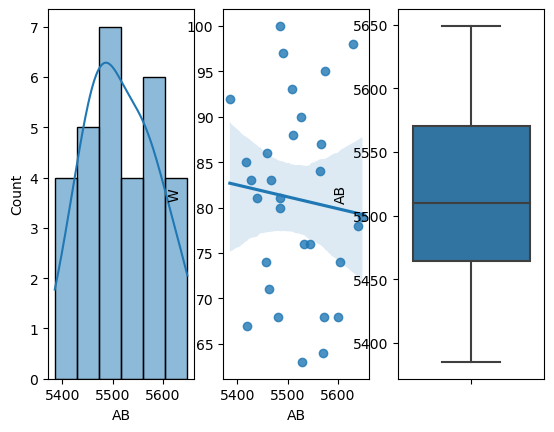

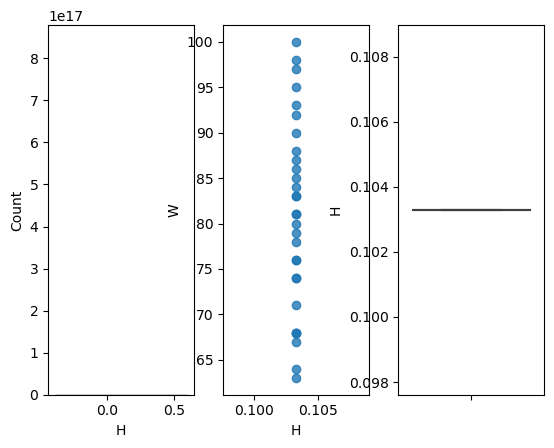

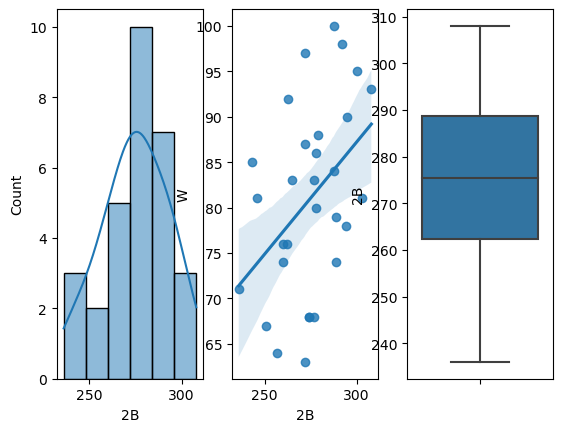

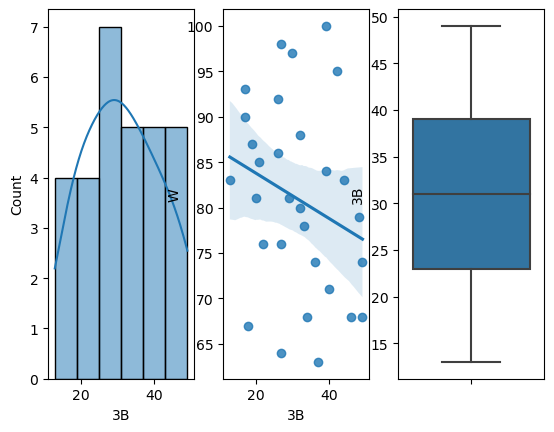

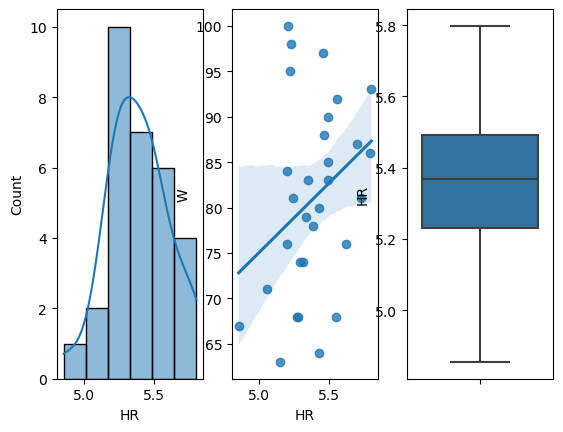

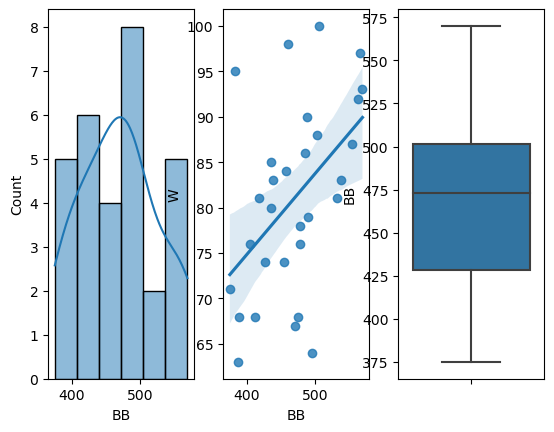

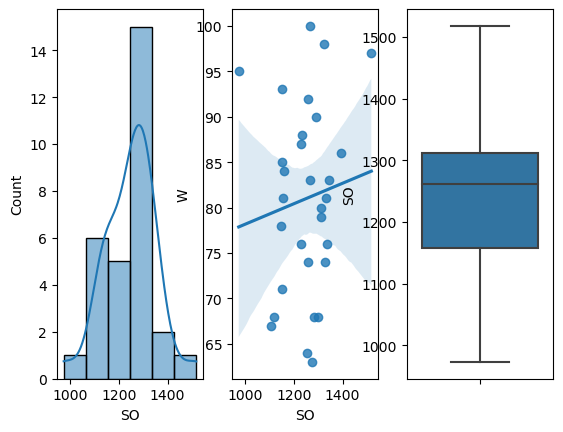

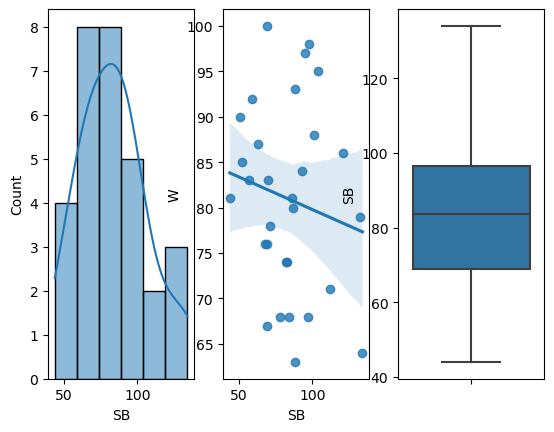

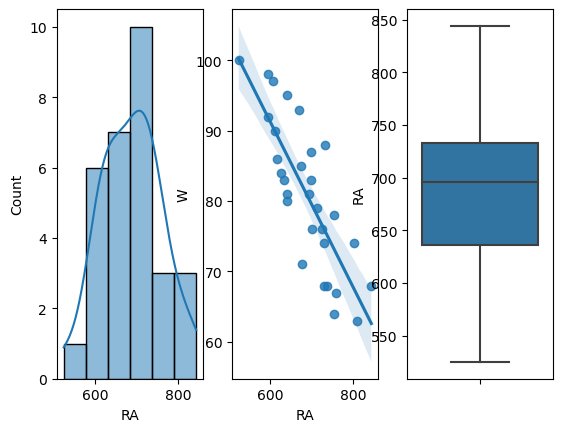

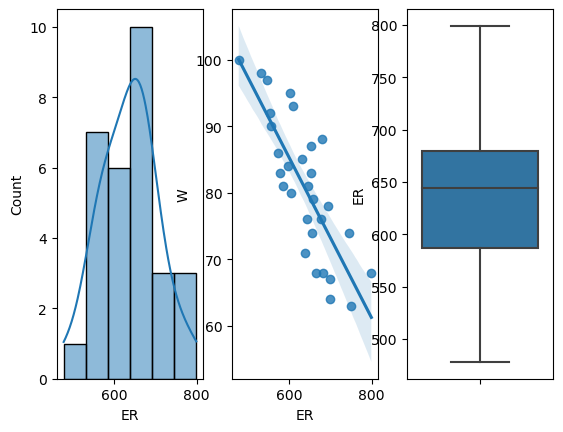

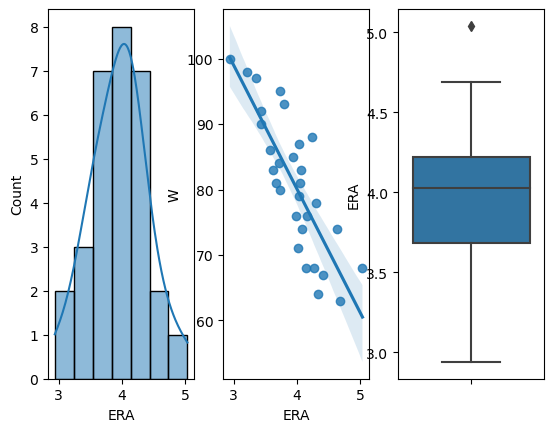

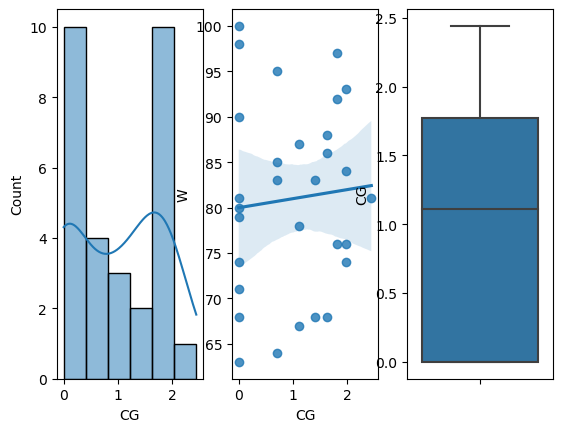

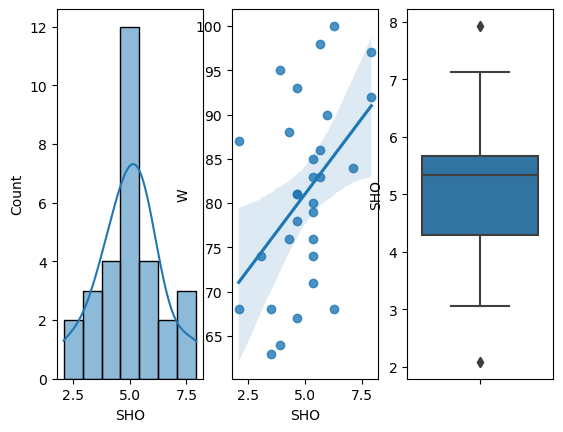

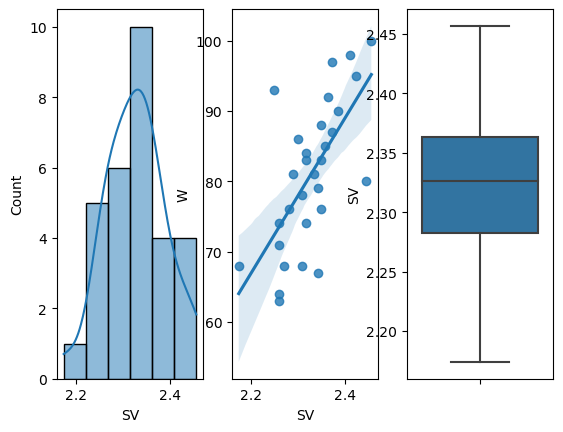

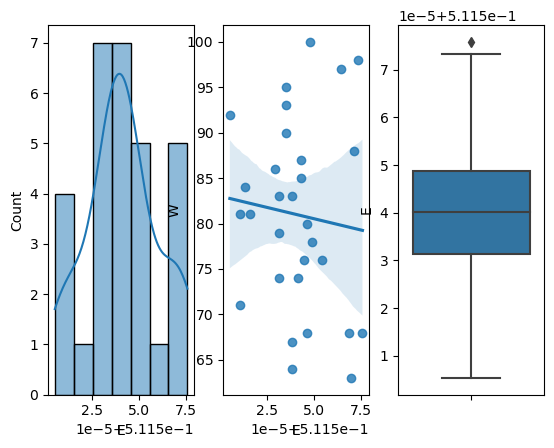

In [16]:
plt.figure(figsize=(8,10), facecolor='white')
pltnum=1
plt.subplots_adjust(wspace=0.9)
for i in df.columns:
    if pltnum<18:
        # First subplot: Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(x=i, data=df, kde=True)
    
    # Second subplot: Regression plot
        plt.subplot(1, 3, 2)
        sns.regplot(x=i, y='W', data=df)
    
    # Third subplot: Box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=i, data=df)
    
    # Display the plots
        plt.show()

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING AND CORRECTION OF OUTLIERS USING Z-SCORE</span>

In [17]:
from scipy.stats import zscore

z_score=zscore(df)
z_score

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.728203,0.847731,NaN,1.420173,1.041193,-0.764565,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.356296,-0.787387,1.546300,-0.334814
1,0.197838,0.261204,-0.711094,NaN,0.127403,1.235809,-0.158587,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.356296,0.250773,0.360248,-0.532064
2,0.003243,-0.244820,-1.115233,NaN,1.588795,-0.223808,-0.689622,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,1.791770,-0.244937,-0.607378,-1.342360
3,-0.483244,-1.285114,0.241522,NaN,-0.828122,-0.418423,-0.878979,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.217079,-0.509413,-0.764190,0.678447
4,-0.677839,0.135616,1.280738,NaN,0.801892,1.722347,-0.329835,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.217079,0.250773,-1.094700,-0.532064
5,1.170814,2.671976,-0.104884,NaN,1.869832,-1.391501,1.937972,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.217079,-0.244937,-1.269142,-0.334814
6,0.587028,1.309675,0.732263,NaN,-0.153633,-1.196885,1.460081,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,0.149822,-2.102350,0.717790,0.104605
7,0.003243,0.551187,-0.451289,NaN,-1.615025,-1.099578,1.583559,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.214670,-0.244937,0.104514,-1.614733
8,-0.094054,-0.770256,-0.451289,NaN,0.183611,0.068115,0.200015,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-1.214670,0.250773,1.905784,0.261533
9,-0.288649,1.088081,1.785913,NaN,1.082929,0.165423,0.007380,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,0.149822,-0.244937,-0.309012,0.408996


In [18]:
outliers=(np.abs(z_score)>3).all(axis=1)
df1=df[~outliers]
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,0.512248,5575,0.103289,300,42,5.221557,383,973,104,641,601,3.73,0.696632,3.903234,2.423919,0.511535
1,83,0.512247,5467,0.103289,277,44,5.350790,439,1264,70,700,653,4.07,0.696632,5.339227,2.350167,0.511531
2,81,0.512247,5439,0.103289,303,29,5.237540,533,1157,86,640,584,3.67,2.439942,4.653556,2.289997,0.511516
3,76,0.512247,5533,0.103289,260,27,5.197157,404,1231,68,701,643,3.98,1.973539,4.287729,2.280246,0.511554
4,74,0.512247,5605,0.103289,289,49,5.314269,455,1259,83,803,746,4.64,1.973539,5.339227,2.259694,0.511531
5,93,0.512248,5509,0.103289,308,17,5.797907,570,1151,88,670,609,3.80,1.973539,4.653556,2.248847,0.511535
6,87,0.512248,5567,0.103289,272,19,5.695991,554,1227,63,698,652,4.03,1.107383,2.084364,2.372400,0.511543
7,81,0.512248,5485,0.103289,246,20,5.722324,418,1331,44,693,646,4.05,0.000000,4.653556,2.334265,0.511511
8,80,0.512247,5485,0.103289,278,32,5.427266,436,1310,87,642,604,3.74,0.000000,5.339227,2.446273,0.511546
9,78,0.512248,5640,0.103289,294,33,5.386184,478,1148,71,753,694,4.31,1.107383,4.653556,2.308551,0.511549


In [19]:
df1.skew()

W      0.047089
R      0.000000
AB     0.183437
H      0.000000
2B    -0.230650
3B     0.129502
HR    -0.000089
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.006031
SHO    0.007266
SV     0.000696
E      0.063484
dtype: float64

<span style="color:Green;font-size: 22px;font-family: verdana;font-weight: bold ">Visulaization: After Removal of Outliers</span>

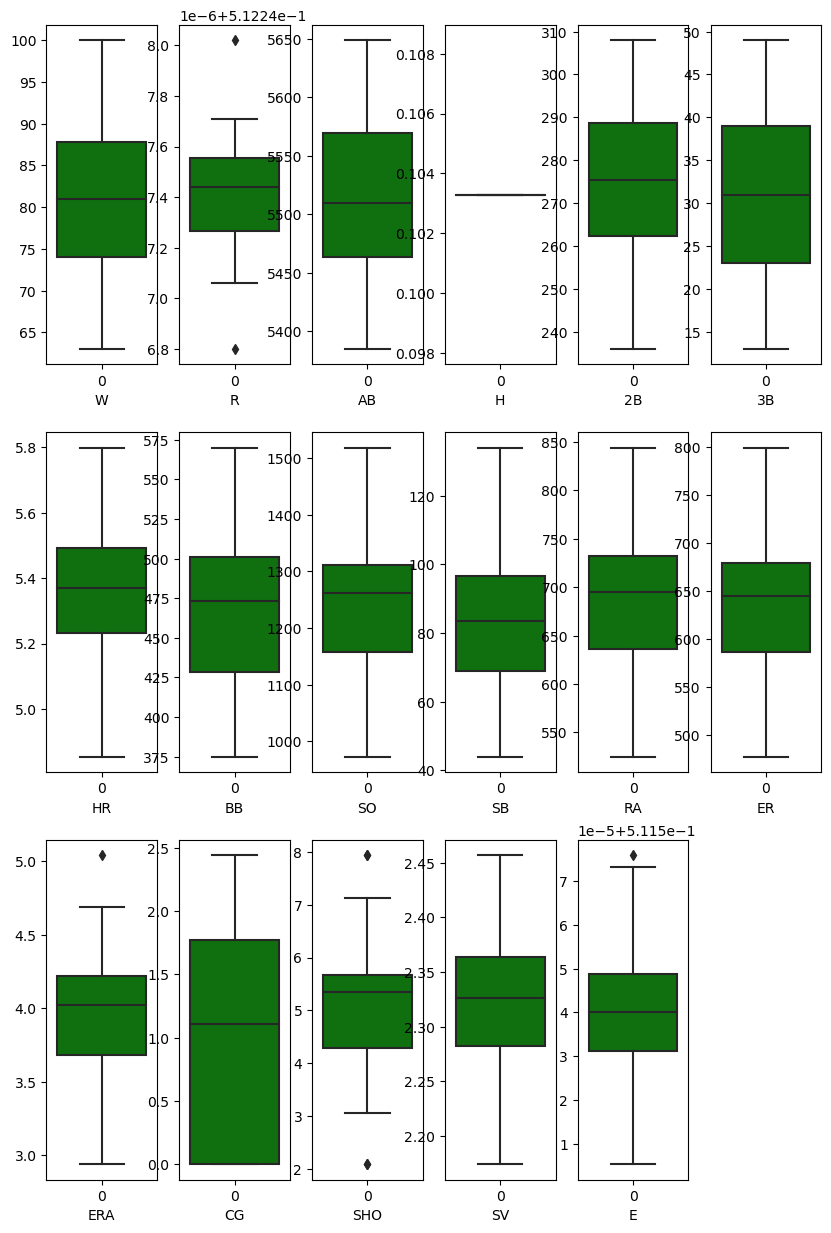

In [20]:
plt.figure(figsize=(10,15), facecolor='white')
pltnum=1
for i in df1.columns:
    if pltnum<18:
        plt.subplot(3,6, pltnum)
        sns.boxplot(df1[i], color='g')
        plt.xlabel(i)
    pltnum+=1
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
df_scaled

array([[ 1.3654086 ,  0.72820349,  0.84773126,  0.        ,  1.42017307,
         1.04119304, -0.7645651 , -1.53490242, -2.69762957,  0.91388329,
        -0.66623393, -0.50511008, -0.50695519, -0.35629645, -0.78738659,
         1.54630009, -0.33481421],
       [ 0.1978383 ,  0.26120401, -0.71109353,  0.        ,  0.12740339,
         1.23580856, -0.15858656, -0.5365919 ,  0.15487844, -0.60182558,
         0.16597077,  0.24892985,  0.25459752, -0.35629645,  0.25077343,
         0.36024777, -0.53206363],
       [ 0.00324325, -0.24481964, -1.1152333 ,  0.        ,  1.58879521,
        -0.22380785, -0.68962235,  1.13914361, -0.89398189,  0.11144918,
        -0.68033909, -0.75162313, -0.64134684,  1.79177005, -0.24493673,
        -0.60737764, -1.34236041],
       [-0.48324437, -1.28511357,  0.24152162,  0.        , -0.82812203,
        -0.41842337, -0.8789788 , -1.16053598, -0.16860185, -0.69098493,
         0.18007593,  0.10392217,  0.05301004,  1.21707942, -0.50941349,
        -0.76418978

In [22]:
df1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,0.512248,5575,0.103289,300,42,5.221557,383,973,104,641,601,3.73,0.696632,3.903234,2.423919,0.511535
1,83,0.512247,5467,0.103289,277,44,5.350790,439,1264,70,700,653,4.07,0.696632,5.339227,2.350167,0.511531
2,81,0.512247,5439,0.103289,303,29,5.237540,533,1157,86,640,584,3.67,2.439942,4.653556,2.289997,0.511516
3,76,0.512247,5533,0.103289,260,27,5.197157,404,1231,68,701,643,3.98,1.973539,4.287729,2.280246,0.511554
4,74,0.512247,5605,0.103289,289,49,5.314269,455,1259,83,803,746,4.64,1.973539,5.339227,2.259694,0.511531
5,93,0.512248,5509,0.103289,308,17,5.797907,570,1151,88,670,609,3.80,1.973539,4.653556,2.248847,0.511535
6,87,0.512248,5567,0.103289,272,19,5.695991,554,1227,63,698,652,4.03,1.107383,2.084364,2.372400,0.511543
7,81,0.512248,5485,0.103289,246,20,5.722324,418,1331,44,693,646,4.05,0.000000,4.653556,2.334265,0.511511
8,80,0.512247,5485,0.103289,278,32,5.427266,436,1310,87,642,604,3.74,0.000000,5.339227,2.446273,0.511546
9,78,0.512248,5640,0.103289,294,33,5.386184,478,1148,71,753,694,4.31,1.107383,4.653556,2.308551,0.511549


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Input Data in Seperate DataFrame</span>

In [23]:
x=df1.drop('W', axis=1)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.512248,5575,0.103289,300,42,5.221557,383,973,104,641,601,3.73,0.696632,3.903234,2.423919,0.511535
1,0.512247,5467,0.103289,277,44,5.350790,439,1264,70,700,653,4.07,0.696632,5.339227,2.350167,0.511531
2,0.512247,5439,0.103289,303,29,5.237540,533,1157,86,640,584,3.67,2.439942,4.653556,2.289997,0.511516
3,0.512247,5533,0.103289,260,27,5.197157,404,1231,68,701,643,3.98,1.973539,4.287729,2.280246,0.511554
4,0.512247,5605,0.103289,289,49,5.314269,455,1259,83,803,746,4.64,1.973539,5.339227,2.259694,0.511531
5,0.512248,5509,0.103289,308,17,5.797907,570,1151,88,670,609,3.80,1.973539,4.653556,2.248847,0.511535
6,0.512248,5567,0.103289,272,19,5.695991,554,1227,63,698,652,4.03,1.107383,2.084364,2.372400,0.511543
7,0.512248,5485,0.103289,246,20,5.722324,418,1331,44,693,646,4.05,0.000000,4.653556,2.334265,0.511511
8,0.512247,5485,0.103289,278,32,5.427266,436,1310,87,642,604,3.74,0.000000,5.339227,2.446273,0.511546
9,0.512248,5640,0.103289,294,33,5.386184,478,1148,71,753,694,4.31,1.107383,4.653556,2.308551,0.511549


In [24]:
x.shape

(30, 16)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Target Data in Seperate DataFrame</span>

In [25]:
y=df1['W']
y

0      95
1      83
2      81
3      76
4      74
5      93
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [26]:
y.shape

(30,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Variance Inflation Factor: Normal Measured Between Predictors or Input Variables</span>

<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">The Variance Inflation Factor (VIF) is a measure of how much the variance of the estimated regression coefficients increases if your predictors are correlated. High VIF values can indicate multicollinearity, which can lead to unstable and unreliable regression coefficients</span>

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Here's a general guideline for interpreting VIF values:</span>



<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">VIF < 5: Low correlation: minimal multicollinearity<span>


<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">VIF between 5 and 10: Moderate correlation</span>


<span style="color:Red;font-size: 32px;font-family: verdana;font-weight: bold ">VIF > 10: High correlation: high multicollinearity</span>

When calculating VIF, you consider each predictor variable (Input Variable) in the context of the other predictor variables. The VIF for a specific predictor measures how much its variance is inflated by the presence of other predictors in the model. The formula for the VIF of a predictor is based on the ratio of the variance of the coefficients in the full model to the variance of the coefficients in a model that excludes the specific predictor.

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [28]:
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Feattures']=x.columns
vif

,VIF values,Feattures
0,9.011995e+00,R
1,9.373123e+00,AB
2,4.481194e+13,H
3,3.099997e+00,2B
4,3.142438e+00,3B
5,9.984363e+00,HR
6,3.278538e+00,BB
7,2.652518e+00,SO
8,1.740791e+00,SB
9,2.002975e+02,RA


<span style="color:magenta;font-size: 15px;font-family: verdana;font-weight: bold ">Interpretation of VIF: The VIF (Variance Inflation Factor) values for features with indices 2, 9, 10, and 11 are quite large.</span>

<span style="color:magenta;font-size: 15px;font-family: verdana;font-weight: bold ">As the VIF of feature name: ER and ERA is very High, We need to drop to limit Multicollinearity</span>

In [29]:
columns_to_drop=['ER', 'ERA']
x=df1.drop(columns_to_drop, axis =1)
x

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,95,0.512248,5575,0.103289,300,42,5.221557,383,973,104,641,0.696632,3.903234,2.423919,0.511535
1,83,0.512247,5467,0.103289,277,44,5.350790,439,1264,70,700,0.696632,5.339227,2.350167,0.511531
2,81,0.512247,5439,0.103289,303,29,5.237540,533,1157,86,640,2.439942,4.653556,2.289997,0.511516
3,76,0.512247,5533,0.103289,260,27,5.197157,404,1231,68,701,1.973539,4.287729,2.280246,0.511554
4,74,0.512247,5605,0.103289,289,49,5.314269,455,1259,83,803,1.973539,5.339227,2.259694,0.511531
5,93,0.512248,5509,0.103289,308,17,5.797907,570,1151,88,670,1.973539,4.653556,2.248847,0.511535
6,87,0.512248,5567,0.103289,272,19,5.695991,554,1227,63,698,1.107383,2.084364,2.372400,0.511543
7,81,0.512248,5485,0.103289,246,20,5.722324,418,1331,44,693,0.000000,4.653556,2.334265,0.511511
8,80,0.512247,5485,0.103289,278,32,5.427266,436,1310,87,642,0.000000,5.339227,2.446273,0.511546
9,78,0.512248,5640,0.103289,294,33,5.386184,478,1148,71,753,1.107383,4.653556,2.308551,0.511549


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">Lets Check VIF again after Dropping Multicollinear Columns</span>

In [30]:
vif=pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
vif['Feattures']=x.columns
vif

,VIF values,Feattures
0,1.454569e+01,W
1,1.199294e+01,R
2,2.280673e+00,AB
3,5.965033e+13,H
4,3.013649e+00,2B
5,2.837009e+00,3B
6,6.520919e+00,HR
7,2.786567e+00,BB
8,2.141957e+00,SO
9,1.568294e+00,SB


<span style="color:magenta;font-size: 15px;font-family: verdana;font-weight: bold ">Now, In above table, VIF has been corrected</span>

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING TRAINING AND TESTING DATA INTO 70:30 RATIO</span>

In [31]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.30)

<span style="color:blue;font-size: 15px;font-family: verdana;font-weight: bold ">CHECKING SHAPES OF SPLIT DATA INTO 70:30 RATIO</span>

In [32]:
X_train.shape

(21, 15)

In [33]:
X_test.shape

(9, 15)

In [34]:
Y_train.shape


(21,)

In [35]:
Y_test.shape

(9,)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Importing Machine learning Model library</span>

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Finding Best Random Size. </span>

In [37]:
minMSE = float('inf')
#Note: This line initializes a variable named minMSE and sets its value to positive infinity (float('inf')). 
#In Python, float('inf') represents positive infinity, which is a special floating-point value representing an unbounded positive quantity.
bestRandomState = 0

for i in range(1, 75):
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    current_mse = mean_squared_error(Y_test, pred)
    
    if current_mse < minMSE:
        minMSE = current_mse
        bestRandomState = i

    print("VAlue of MSE is ", minMSE, " at Random State ", bestRandomState)

print("Minimum MSE is ", minMSE, " at Random State ", bestRandomState)

VAlue of MSE is  3.1975162024958344e-28  at Random State  1
VAlue of MSE is  3.1975162024958344e-28  at Random State  1
VAlue of MSE is  3.1975162024958344e-28  at Random State  1
VAlue of MSE is  3.1975162024958344e-28  at Random State  1
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random State  5
VAlue of MSE is  8.975484077181289e-29  at Random St

<span style="color:magenta;font-size: 22px;font-family: verdana;font-weight: bold ">Note: In the context of regression, a lower mean squared error indicates better model performance, as it means that the predicted values are closer to the true values</span>

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Minimum MSE is  2.2438710192953223e-29  at Random State  49 </span>


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">LINEAR REGRESSION MODEL </span>

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=49)
Lr=LinearRegression()
Lr.fit(X_train,Y_train)
pred_Lr=Lr.predict(X_test)
pred_train=Lr.predict(X_train)
#mean_sq_err=mean_squared_error(pred,Y_test)
#print(mean_sq_err)

print("r_2 score", r2_score(Y_test,pred_Lr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_Lr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_Lr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_Lr)))

r_2 score 1.0
r_2 score on Training Data 1.0
Mean Absolute Error: 1.578983857244667e-15
Mean Square Error: 2.2438710192953223e-29
Root Square Error: 4.736951571734001e-15


In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.30, random_state=49)
lr=LinearRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
mean_sq_err=(pred,Y_test)
print("Predictions:", pred)
print("True Values:\n", Y_test)


Predictions: [ 68.  78.  98.  63.  74. 100.  79.  81.  64.]
True Values:
 14     68
9      78
16     98
24     63
28     74
15    100
27     79
7      81
19     64
Name: W, dtype: int64


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">R2 score ranges from 0 to 1, where 1 indicates perfect predictions and 0 indicates that the model does not explain any variance in the target variable</span>

<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">Importance of R-squared (R2) Score of training data:!
The R-squared (R2) score is a measure of how well the independent variables explain the variance in the dependent variable. In the context of training data, the R2 score is important as it provides insights into how well your model fits the training data </span>


<span style="color:Red;font-size: 22px;font-family: verdana;font-weight: bold ">A high R2 score on the training data indicates that the model is able to explain a significant portion of the variability in the dependent variable using the independent variables. This suggests that the model is a good fit for the training data</span>

<span style="color:Blue;font-size: 20px;font-family: verdana;font-weight: bold ">RANDOM FOREST REGRESSOR </span>


In [40]:
RFR=RandomForestRegressor()
RFR.fit(X_train, Y_train)
RFR.fit(X_train,Y_train)
pred_RFR=RFR.predict(X_test)
pred_train=RFR.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_RFR ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_RFR ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_RFR))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_RFR)))

r_2 score 0.8717183216783218
r_2 score on Training Data 0.9836472637533914
Mean Absolute Error: 3.7600000000000002
Mean Square Error: 20.38253333333333
Root Square Error: 4.514701909687209


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">K NEAREST NEIGHBOR </span>

In [41]:
knn=KNN()

knn.fit(X_train, Y_train)
knn.fit(X_train,Y_train)
pred_knn=knn.predict(X_test)
pred_train=knn.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_knn ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_knn ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_knn))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_knn)))

r_2 score 0.20668531468531492
r_2 score on Training Data 0.4148900305951627
Mean Absolute Error: 9.444444444444443
Mean Square Error: 126.04888888888884
Root Square Error: 11.227149633316946


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">GRADIENT BOOSTING REGRESSOR </span>


In [42]:
gbb=GradientBoostingRegressor()
gbb.fit(X_train, Y_train)
gbb.fit(X_train,Y_train)
pred_gbb=gbb.predict(X_test)
pred_train=gbb.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_gbb ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_gbb ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_gbb))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_gbb)))

r_2 score 0.9392028046842031
r_2 score on Training Data 0.9999999989272074
Mean Absolute Error: 2.5044163646637667
Mean Square Error: 9.659998811287718
Root Square Error: 3.108053862353051


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">LASSO MODEL </span>

In [43]:
lasso=Lasso()
lasso.fit(X_train, Y_train)
lasso.fit(X_train,Y_train)
pred_lasso=lasso.predict(X_test)
pred_train=lasso.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_lasso ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_lasso ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_lasso))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_lasso)))


r_2 score 0.9994646793568236
r_2 score on Training Data 0.9996316641842479
Mean Absolute Error: 0.23064279880326113
Mean Square Error: 0.08505650219358386
Root Square Error: 0.2916444791069837


<span style="color:blue;font-size: 20px;font-family: verdana;font-weight: bold ">RIDGE MODEL </span>

In [44]:
rd=Ridge()
rd.fit(X_train, Y_train)
rd.fit(X_train,Y_train)
pred_rd=rd.predict(X_test)
pred_train=rd.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_rd ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_rd ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_rd))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_rd)))

r_2 score 0.9999964309661494
r_2 score on Training Data 0.9999985436827289
Mean Absolute Error: 0.018375779859505472
Mean Square Error: 0.0005670798229325532
Root Square Error: 0.02381343786462915


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Decision Tree Regressor </span>

In [45]:
dtr= DecisionTreeRegressor()
dtr.fit(X_train, Y_train)
dtr.fit(X_train,Y_train)
pred_dtr=dtr.predict(X_test)
pred_train=dtr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_dtr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_dtr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_dtr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_dtr)))


r_2 score 0.7475524475524475
r_2 score on Training Data 1.0
Mean Absolute Error: 5.444444444444445
Mean Square Error: 40.111111111111114
Root Square Error: 6.333333333333334


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">SVR MODEL </span>

In [46]:
svr=SVR()

svr.fit(X_train, Y_train)
svr.fit(X_train,Y_train)
pred_svr=svr.predict(X_test)
pred_train=svr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_svr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_svr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_svr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_svr)))


r_2 score -0.1422009184254045
r_2 score on Training Data -0.012004345585638232
Mean Absolute Error: 11.828737312260593
Mean Square Error: 181.48303481648094
Root Square Error: 13.471563933578052


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Extra Trees Regressor </span>

In [47]:
etr=ExtraTreesRegressor()

etr.fit(X_train, Y_train)
etr.fit(X_train,Y_train)
pred_etr=etr.predict(X_test)
pred_train=etr.predict(X_train)

print("r_2 score", r2_score(Y_test,pred_etr ))
print("r_2 score on Training Data",r2_score(Y_train,pred_train ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_etr ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_etr))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_etr)))

r_2 score 0.9417009790209792
r_2 score on Training Data 1.0
Mean Absolute Error: 2.2511111111111086
Mean Square Error: 9.263066666666653
Root Square Error: 3.0435286538271087


<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Difference between r_2 score of Linear Regression and CVS </span>

<span style="color:red;font-size: 15px;font-family: verdana;font-weight: bold ">The cross-validation score is a measure of the model's predictive performance on unseen data. It is often used to estimate how well the model will perform on new, unseen samples</span>

<span style="color:red;font-size: 15px;font-family: verdana;font-weight: bold ">Common cross-validation techniques include k-fold cross-validation, where the dataset is split into k subsets, and the model is trained and tested k times, each time using a different subset for testing</span>

 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Linear Regression and Cross Validation Score</span>

In [48]:
score=cross_val_score(Lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_Lr )- score.mean())

[1. 1. 1. 1. 1.]
1.0
Difference between r_2 score and Cross Validation score is 0.0


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Random Forest Regression and Cross Validation Score</span>

In [49]:
score1=cross_val_score(RFR, x, y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_RFR )- score1.mean())

[0.92347309 0.71595954 0.77738606 0.89992207 0.94677805]
0.8527037629148113
Difference between r_2 score and Cross Validation score is 0.019014558763510436


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of K Nearest Neighbor and Cross Validation Score</span>

In [50]:
score2=cross_val_score(knn, x, y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_knn )- score2.mean())

[-0.19850799 -2.50564885  0.01326733 -0.61172998  0.7227929 ]
-0.5159653212034974
Difference between r_2 score and Cross Validation score is 0.7226506358888123


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Gradient Boost and Cross Validation Score</span>

In [51]:
score3=cross_val_score(gbb, x, y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_gbb )- score3.mean())

[0.97802753 0.92172848 0.88959375 0.88128397 0.95366539]
0.9248598246145019
Difference between r_2 score and Cross Validation score is 0.01434298006970125


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Lasso and Cross Validation Score</span>

In [52]:
score4=cross_val_score(lasso, x, y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score4.mean())

[0.99886429 0.99692265 0.99964118 0.99909609 0.99992721]
0.9988902847496274
Difference between r_2 score and Cross Validation score is 0.0005743946071962158


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Ridge and Cross Validation Score</span>

In [53]:
score5=cross_val_score(rd, x, y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_lasso )- score5.mean())

[0.9999961  0.99998502 0.99999599 0.99999777 0.99999978]
0.9999949319973851
Difference between r_2 score and Cross Validation score is -0.0005302526405615016


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Decession Tree Regressor and Cross Validation Score</span>

In [54]:
score6=cross_val_score(dtr, x, y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_dtr )- score6.mean())

[ 0.79484902 -0.80916031  0.93373953  0.81350078  0.81893491]
0.5103727883435937
Difference between r_2 score and Cross Validation score is 0.23717965920885387


 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of SVR and Cross Validation Score</span>

score7=cross_val_score(svr, x, y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_svr )- score7.mean())

 <span style="color:green;font-size: 12px;font-family: verdana;font-weight: bold ">Difference Between R-squared (R²) score, (or coefficient of determination) of Extra Tree Regressor and Cross Validation Score</span>

In [66]:
score8=cross_val_score(etr, x, y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print("Difference between r_2 score and Cross Validation score is", r2_score(Y_test,pred_etr )- score8.mean())

[0.95125506 0.80334885 0.86553614 0.97020251 0.97195355]
0.9124592235624908
Difference between r_2 score and Cross Validation score is 0.029241755458488394


<span style="color:Blue;font-size: 30px;font-family: verdana;font-weight: bold ">Interpretation</span>

<span style="color:red;font-size: 20px;font-family: verdana;font-weight: bold ">In Case of Linear Regression: A difference of 0.0 between R² score and cross-validation score suggests that the model is performing consistently across different folds. This could indicate good generalization, but you should also consider the absolute values of the scores</red>

<span style="color:green;font-size: 20px;font-family: verdana;font-weight: bold ">In case of Gradient Boost Regressor: small difference of 0.014 between R² score and cross-validation score suggests relatively stable performance. Gradient Boosting Regressor is known for its high predictive power, but it may be computationally expensive compared to simpler models</span>

<span style="color:tomato;font-size: 20px;font-family: verdana;font-weight: bold ">In Case of Lasso Model: A very small difference of 0.000574 indicates stability, and Lasso regression is useful for feature selection as it tends to shrink some coefficients to exactly zero. If feature sparsity is important, this might be a good choice</span>

<span style="color:magenta;font-size: 20px;font-family: verdana;font-weight: bold ">Ridge:A small negative difference of -0.00053 suggests a consistent performance as well. Ridge regression is useful for handling multicollinearity and can be a good choice when there are correlated features</span>

<span style="color:Blue;font-size: 30px;font-family: verdana;font-weight: bold ">DECSESSION MAKING POINT</SPAN>

<span style="color:green;font-size: 20px;font-family: verdana;font-weight: bold ">Overall Model Performance: Look at the absolute values of the R² score and cross-validation score for each model. A higher R² score and cross-validation score generally indicate better performance</span>

<span style="color:RED;font-size: 30px;font-family: verdana;font-weight: bold ">On the basis of forementioned points, I have selected LINEAR REGRESSION as the best GENERALISED Model</span>

<span style="color:blue;font-size: 22px;font-family: verdana;font-weight: bold ">Performing a grid search for hyperparameter tuning in a Linear Regression model</span>


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [57]:
from sklearn.model_selection import GridSearchCV


In [60]:
Lr=LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],  
    'copy_X': [True, False],           
    'n_jobs': [-1],                    # Number of CPU cores to use (set to -1 to use all available cores)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(Lr, param_grid, cv=5, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


In [62]:
Lr=LinearRegression(copy_X= True, fit_intercept= True, n_jobs= -1)
final_model=Lr.fit(X_train,Y_train)
pred_finally=final_model.predict(X_test)

print("r_2 score", r2_score(Y_test,pred_finally ))
print("Mean Absolute Error:", mean_absolute_error(Y_test,pred_finally ))
print("Mean Square Error:", mean_squared_error(Y_test,pred_finally))
print("Root Square Error:", np.sqrt(mean_squared_error(Y_test,pred_finally)))

r_2 score 1.0
Mean Absolute Error: 1.578983857244667e-15
Mean Square Error: 2.2438710192953223e-29
Root Square Error: 4.736951571734001e-15


<span style="color:blue;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>


In [63]:
import joblib
joblib.dump(final_model,'BaseBallCaseStudy.pkl')

['BaseBallCaseStudy.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [65]:
prediction = final_model.predict(X_test)
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head()


,Predicted Values,Actual Values
0,68.0,68
1,78.0,78
2,98.0,98
3,63.0,63
4,74.0,74
